<br>
<br>
<br>
<div style="text-align: center;">
  <img src="Images/Finetuned.jpg" alt="Finetuned">
</div>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>


<div style="text-align: center;">
  <img src="Images/Fewshot.jpg" alt="Fewshot">
</div>
<br>
<br>
<br><br>
<br>
<br><br>
<br>
<br><br>
<br><br>
<br>
<br>
<br>

# Few-Shot Learning: Introduction

**What is Few-Shot Learning?**

Traditional supervised learning relies on large datasets with many labeled examples per class. In contrast, **few-shot learning (FSL)** aims to learn new concepts from **very few labeled examples**, sometimes as few as 1–5 per class. 

## Why Few-Shot Learning Is Useful

Few-shot learning is designed for scenarios where standard supervised learning is impractical or inefficient. 
Below are the main reasons why few-shot methods are important in real-world machine learning systems.

---

### 1. Data Is Expensive or Hard to Collect

In many domains, collecting large labeled datasets is not feasible.

Examples:
- **Medical imaging:** Labeling an image may require a trained radiologist or pathologist.
- **Rare diseases:** There may be only a handful of available patient cases.
- **Wildlife monitoring:** Some species are rare, endangered, or difficult to photograph.
- **Industrial defects:** Failures are rare by definition, so examples are scarce.

In such settings:
- Collecting thousands of labeled examples per class is unrealistic.
- Traditional deep learning models overfit when trained on very small datasets.

Few-shot learning addresses this by:
- Relying on **prior knowledge learned from other data**
- Requiring only a few labeled examples to recognize a new class

**The key assumption is that the model has already learned *how to represent the domain*, 
and the few examples only specify what is new.**

---

### 2. Rapid Adaptation to New Tasks Is Needed

In many applications, new categories appear frequently and models must adapt quickly.

Examples:
- **Personalized systems:** A model adapts to a new user's preferences.
- **Security systems:** New attack patterns or anomalies appear.
- **Robotics:** A robot encounters new objects or environments.
- **Content moderation:** New types of content or trends emerge.

In these cases:
- Retraining a large model from scratch is slow and computationally expensive.
- Collecting large datasets for each new task is impractical.

Few-shot learning allows:
- Adding new classes using only a few examples
- Avoiding full retraining of the model
- Near-instant adaptation at deployment time

This makes few-shot learning suitable for **on-the-fly learning**.

---

### 3. Leveraging Pre-Existing Knowledge Efficiently

Few-shot learning is built on the idea that models should reuse what they already know.

Modern machine learning models are often:
- Pretrained on massive datasets
- Rich in general-purpose representations

Examples:
- Vision models pretrained on ImageNet
- Language models pretrained on large text corpora
- Speech models pretrained on large audio datasets

Few-shot learning leverages this by:
- Keeping the pretrained representation fixed
- Using a small number of examples to define new tasks in that representation space

Instead of learning from scratch:
- The model uses similarity, distance, or contextual cues
- Knowledge transfers from old tasks to new ones

This leads to:
- Better generalization
- Lower data requirements
- More efficient use of computational resources

---

### Summary

Few-shot learning is useful when:
- Large labeled datasets are unavailable
- Fast adaptation is required

In short, few-shot learning shifts the focus from *learning from data* to *using knowledge effectively*.


---

**Key Concepts**

- **N-way K-shot learning:**  
  - **N** = number of classes to classify  
  - **K** = number of labeled examples per class  
  Example: 5-way 1-shot = classify among 5 classes, 1 labeled example per class  

- **Support Set:** the small labeled dataset used for learning  
- **Query Set:** the dataset of new/unseen examples to classify  



# Metric-Based Few-Shot Learning

**Goal:**  
Classify new examples when you have **very few labeled examples per class**. Instead of training a full classifier from scratch, you learn a **feature space (embedding space)** where you can measure similarity between examples.

---

Examples of Metric-Based Approaches

**Prototypical Networks**: use the mean embedding as the prototype.

**Matching Networks**: compare query embeddings to all support embeddings with attention-weighted similarity.

**Siamese Networks**: learn a network that directly predicts if two examples are from the same class (distance learning).

---

## Prototypical Networks Key Idea

1. **Embed all examples into a feature space**  
   - A neural network (or other function) maps each input $x$ to an embedding $f(x)$.  
   - Ideally, embeddings of the **same class are close**, and embeddings of **different classes are far apart**.

2. **Compute a "prototype" for each class**  
   - For each class $c$, compute the **average embedding** of the support examples:  
     
     $$
     \mathbf{p}_c = \frac{1}{K} \sum_{i=1}^{K} f(x_i^c)
     $$
     
     where $x_i^c$ is the $i$-th support example of class $c$, and $K$ is the number of support examples per class.  
   - Think of this as the **center of the cluster** in embedding space.

3. **Classify query examples**  
   - For a new (query) example $x_q$, compute its embedding $f(x_q)$.  
   - Measure the distance to each prototype (usually **Euclidean** or **cosine similarity**).  
   - Assign $x_q$ to the class of the **nearest prototype**.

---

## Intuition / Visualization

- Imagine a 2D plot:  
  - Each point = an example  
  - Points from the same class cluster together  
  - Prototypes = black stars at the center of each cluster  
  - Query points = classified by "nearest star"  

- Even with **just 1-5 examples per class**, if the embedding space is well-structured, you can classify correctly.

---

## Why Metric-Based Works in Few-Shot Learning

1. **No need to retrain a large classifier** – you just compare distances.  
2. **Leverages learned feature representations** – you can pretrain the embedding network on other data.  
3. **Scalable to new classes** – adding a new class is just computing its prototype; no extra training.  

---

**In short:** Metric-based few-shot learning is **“learn a good embedding space, then classify by distance”**.


**Prototypical Networks:** compute a "prototype" for each class by averaging support embeddings.  
- Classify a query sample based on nearest prototype in embedding space.  
- Advantages: simple, intuitive, often works well with pre-trained embeddings.  

**Intuition:**  
Imagine a 2D plot where points represent features of examples:
- Points from the same class cluster together
- Prototypes are the "center" of each cluster
- New points are classified based on proximity to these centers
  


Synthetic data example:

In [152]:
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F


torch.manual_seed(42)

n_way = 4       # number of classes
k_shot = 5      # support examples per class
n_query = 5     # query examples per class


support_x = []
support_y = []
query_x = []
query_y = []

class_centers = torch.randn(n_way, 2) * 4

for c in range(n_way):
    support_x.append(torch.randn(k_shot, 2) + class_centers[c])
    support_y.append(torch.full((k_shot,), c))
    
    query_x.append(torch.randn(n_query, 2) + class_centers[c])
    query_y.append(torch.full((n_query,), c))

support_x = torch.cat(support_x, dim=0)
support_y = torch.cat(support_y, dim=0)
query_x = torch.cat(query_x, dim=0)
query_y = torch.cat(query_y, dim=0)

all_x = torch.cat([support_x, query_x], dim=0)
all_y = torch.cat([support_y, query_y], dim=0)

In [153]:
# Normally this would be a pretrained embedding network (e.g. ResNet, ViT, DINO)
class SimpleEmbed(nn.Module):
    def __init__(self, input_dim=2, hidden_dim=32, output_dim=2):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, output_dim)
        )

    def forward(self, x):
        return self.net(x)

model = SimpleEmbed()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [157]:
# Training loop (Prototypical learning)
for epoch in range(500):
    optimizer.zero_grad()
    
    embeds = model(all_x)
    support_embeds = embeds[:n_way * k_shot]
    query_embeds = embeds[n_way * k_shot:]
    
    # Compute prototypes
    prototypes = []
    for c in range(n_way):
        class_embeds = support_embeds[support_y == c]
        prototypes.append(class_embeds.mean(dim=0))
    prototypes = torch.stack(prototypes)
    #torch.cdist - computes batched the p-norm distance between each pair of the two collections of row vectors
    dists = torch.cdist(query_embeds, prototypes)
    loss = F.cross_entropy(-dists, query_y)
    
    loss.backward()
    optimizer.step()
    
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}")

# Evaluation
with torch.no_grad():
    embeds = model(all_x)
    support_embeds = embeds[:n_way * k_shot]
    query_embeds = embeds[n_way * k_shot:]
    
    prototypes = torch.stack([
        support_embeds[support_y == c].mean(dim=0)
        for c in range(n_way)
    ])
    
    dists = torch.cdist(query_embeds, prototypes)
    preds = dists.argmin(dim=1)
    acc = (preds == query_y).float().mean()
    print(f"Few-shot accuracy: {acc.item():.2f}")

Epoch 0, Loss: 1.1443
Epoch 100, Loss: 0.2642
Epoch 200, Loss: 0.2302
Epoch 300, Loss: 0.1964
Epoch 400, Loss: 0.0839
Few-shot accuracy: 1.00


**Why this is different from standard classification?**

Standard supervised learning:

1. Fixed classes
2. Many samples per class
3. Train a classifier head (Linear + softmax)
4. Same labels during train and test
 
Few-shot:

1. No classifier head
2. No fixed class weights (prototypes computed on the fly)
3. Classes are defined per episode (prototypes defined each time)
4. Classification is done via distances in embedding space

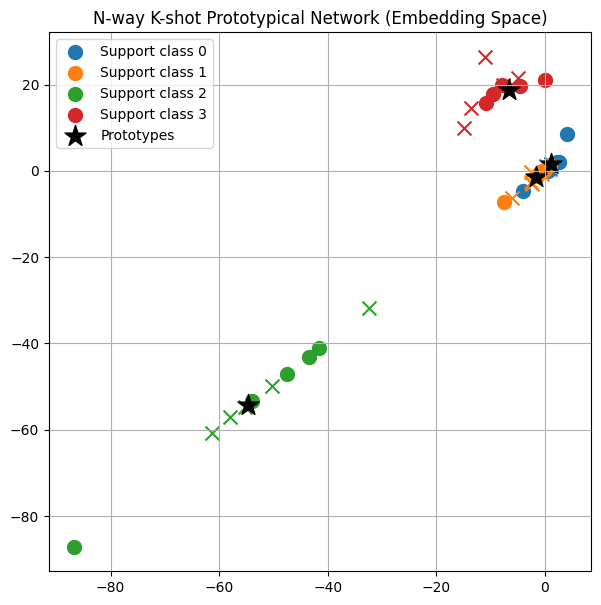

In [158]:
plt.figure(figsize=(7, 7))
colors = plt.cm.tab10.colors

for c in range(n_way):
    idx = support_y == c
    plt.scatter(
        support_embeds[idx, 0],
        support_embeds[idx, 1],
        color=colors[c],
        label=f"Support class {c}",
        s=100
    )
    
    qidx = query_y == c
    plt.scatter(
        query_embeds[qidx, 0],
        query_embeds[qidx, 1],
        color=colors[c],
        marker="x",
        s=100
    )

plt.scatter(
    prototypes[:, 0],
    prototypes[:, 1],
    color="black",
    marker="*",
    s=250,
    label="Prototypes"
)

plt.legend()
plt.title("N-way K-shot Prototypical Network (Embedding Space)")
plt.grid(True)
plt.show()


Real-life data example:

In [159]:
# Real-life example
# Few-Shot Learning: Before vs After
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as T
import random
from collections import defaultdict

torch.manual_seed(42)
device = "cuda" if torch.cuda.is_available() else "cpu"

n_way = 4
k_shot = 5
n_query = 5


transform = T.Compose([
    T.Resize(224),
    T.ToTensor(),
    T.Normalize(mean=[0.485, 0.456, 0.406],
                std=[0.229, 0.224, 0.225])
])

dataset = torchvision.datasets.CIFAR10(
    root="./data",
    train=False,
    download=True,
    transform=transform
)

In [160]:
class_to_indices = defaultdict(list)
#key - class, value - indices of data belonging to given class
for idx, (_, label) in enumerate(dataset):
    class_to_indices[label].append(idx)

selected_classes = random.sample(list(class_to_indices.keys()), n_way)

support_x, support_y = [], []
query_x, query_y = [], []

for c_idx, c in enumerate(selected_classes):
    indices = random.sample(class_to_indices[c], k_shot + n_query)
    for i in indices[:k_shot]:
        img, _ = dataset[i]
        support_x.append(img)
        support_y.append(c_idx)
    for i in indices[k_shot:]:
        img, _ = dataset[i]
        query_x.append(img)
        query_y.append(c_idx)

support_x = torch.stack(support_x).to(device)
query_x = torch.stack(query_x).to(device)
support_y = torch.tensor(support_y).to(device)
query_y = torch.tensor(query_y).to(device)

In [161]:
# PRE few-shot:
model = torchvision.models.resnet18(weights=True)
model = model.to(device)
model.eval()

with torch.no_grad():
    logits_pre = model(query_x)           
    pre_preds = logits_pre.argmax(dim=1)  
    pre_acc = (pre_preds == query_y).float().mean().item()


/home/milosz/jupyter-env/lib/python3.13/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [162]:
# POST few-shot: prototypical classification
backbone = torchvision.models.resnet18(weights=True)
backbone.fc = nn.Identity()  # remove classifier head
backbone = backbone.to(device)
backbone.eval()

with torch.no_grad():
    support_embeds = backbone(support_x)
    query_embeds = backbone(query_x)

prototypes = torch.stack([
    support_embeds[support_y == c].mean(dim=0)
    for c in range(n_way)
])

dists = torch.cdist(query_embeds, prototypes)
proto_preds = dists.argmin(dim=1)
proto_acc = (proto_preds == query_y).float().mean().item()

In [163]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

all_embeds = torch.cat([support_embeds, query_embeds], dim=0).cpu().numpy()
tsne = TSNE(n_components=2, random_state=42)
all_2d = tsne.fit_transform(all_embeds)

support_2d = all_2d[:len(support_embeds)]
query_2d = all_2d[len(support_embeds):]

colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k', 'orange'][:n_way]


In [164]:
print("Few-Shot Learning Performance Comparison")
print("----------------------------------------")
print(f"N-way: {n_way}, K-shot: {k_shot}, Queries/class: {n_query}")
print()
print(f"Before few-shot (random guessing): {acc_random:.2f}")
print(f"After few-shot (prototypical):     {acc_proto:.2f}")
print()
print("Gain from few-shot learning: "
      f"{acc_proto - acc_random:+.2f}")


Few-Shot Learning Performance Comparison
----------------------------------------
N-way: 4, K-shot: 5, Queries/class: 5

Before few-shot (random guessing): 0.20
After few-shot (prototypical):     0.95

Gain from few-shot learning: +0.75


**Exercise 1**

In [85]:
import torch
import torch.nn as nn
import torch.nn.functional as F

torch.manual_seed(42)

n_way = 3
k_shot = 5
n_query = 5


support_x = []
support_y = []
query_x = []
query_y = []

class_centers = torch.randn(n_way, 2) * 4

for c in range(n_way):
    support_x.append(torch.randn(k_shot, 2) + class_centers[c])
    support_y.append(torch.full((k_shot,), c))

    query_x.append(torch.randn(n_query, 2) + class_centers[c])
    query_y.append(torch.full((n_query,), c))

support_x = torch.cat(support_x, dim=0)
support_y = torch.cat(support_y, dim=0)
query_x = torch.cat(query_x, dim=0)
query_y = torch.cat(query_y, dim=0)


class SimpleEmbed(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(2, 32),
            nn.ReLU(),
            nn.Linear(32, 2)
        )

    def forward(self, x):
        return self.net(x)


model = SimpleEmbed()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# --------------------------
# Training loop
# --------------------------
for epoch in range(200):
    optimizer.zero_grad()

    # --------------------------
    # TODO 1: Compute embeddings
    # --------------------------
    support_embeds = None
    query_embeds = None

    # --------------------------
    # TODO 2: Compute prototypes
    # --------------------------
    prototypes = None

    # --------------------------
    # TODO 3: Compute loss
    # --------------------------
    dists = None
    loss = None

    loss.backward()
    optimizer.step()

    if epoch % 50 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}")


# --------------------------
# TODO 4: Compute loss
# --------------------------
with torch.no_grad():
    support_embeds = None
    query_embeds = None

    prototypes = None

    dists = None
    preds = None
    acc = None

print(f"Few-shot accuracy: {acc:.2f}")


AttributeError: 'NoneType' object has no attribute 'backward'

## Matching Networks: Attention over Support Set

Matching Networks are a few-shot learning approach that extends the ideas of Prototypical Networks by comparing each query example to **all support examples** rather than computing a single prototype per class. This allows the model to capture more detailed relationships in the support set, which can be especially helpful when classes are diverse or have complex distributions.

### Key Ideas

- **Support Set Comparison:**  
  Each query embedding is compared to **every support embedding** using a similarity function (e.g., cosine similarity or dot product).

- **Attention-Weighted Prediction:**  

  In Matching Networks, a query is compared to **all support examples**. The prediction is a **weighted sum of the support labels**, where the weights are determined by similarity to the query.

  Let $q$ be a query example and $S = \{(x_i, y_i)\}$the support set. Then the predicted label is:

  $$
  \hat{y}_q = \sum_{i \in S} a(q, x_i) \, y_i
  $$

  The attention weights $a(q, x_i)$ are computed as a softmax over similarities:

  $$
  a(q, x_i) = \frac{\exp(\text{sim}(f(q), f(x_i)))}{\sum_{j \in S} \exp(\text{sim}(f(q), f(x_j)))} \,,
  $$

  where:  
  - $f(\cdot)$ is the embedding function (e.g., CNN).  
  - $\text{sim}(\cdot, \cdot)$ is a similarity function (commonly **cosine similarity** or **dot product**).  
  - $y_i$ is the label of support example $x_i$ (usually one-hot encoded).  

  This allows the query to **attend to the most relevant support examples**, weighting their influence in the final prediction.

  Predicted label:   $argmax(\hat{y}_q)$


- **Contextual Embeddings (Optional Advanced):**  
  In the original Matching Networks paper, embeddings can be **contextualized** using a BiLSTM over the support set. This allows each embedding to depend on the rest of the support set, potentially improving performance.

### Comparison with Prototypical Networks

| Feature | Prototypical Network | Matching Network |
|---------|--------------------|----------------|
| Class Representation | Prototype (mean) | All support points |
| Query Comparison | Query ↔ Prototype | Query ↔ All support embeddings (attention) |
| Flexibility | Limited to class mean | Can handle heterogeneous or overlapping classes better |
| Complexity | Lower | Higher (more pairwise computations) |

### Advantages of Matching Networks

- Captures finer-grained information from the support set.
- Can adapt better when class distributions are complex.
- Visualizable attention weights provide insight into which support points influence predictions.

### Applications

- Synthetic datasets for teaching few-shot concepts.
- Pretrained CNN embeddings for real datasets like CIFAR-10.
- Useful baseline to compare with Prototypical Networks and other metric-based few-shot methods.


In [108]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as T
import random
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt
import numpy as np

torch.manual_seed(42)
device = "cuda" if torch.cuda.is_available() else "cpu"

n_way = 4
k_shot = 5
n_query = 5


In [109]:
transform = T.Compose([
    T.Resize(224),
    T.ToTensor(),
    T.Normalize(mean=[0.485, 0.456, 0.406],
                std=[0.229, 0.224, 0.225])
])

dataset = torchvision.datasets.CIFAR10(
    root="./data",
    train=False,
    download=True,
    transform=transform
)

# Pick n_way random classes
classes = random.sample(range(10), n_way)

# Sample k_shot + n_query examples per class
support_x, support_y, query_x, query_y = [], [], [], []

for c in classes:
    idxs = [i for i, label in enumerate(dataset.targets) if label == c]
    sampled = random.sample(idxs, k_shot + n_query)
    for i, s in enumerate(sampled):
        img, label = dataset[s]
        if i < k_shot:
            support_x.append(img)
            support_y.append(classes.index(label))
        else:
            query_x.append(img)
            query_y.append(classes.index(label))

support_x = torch.stack(support_x).to(device)
support_y = torch.tensor(support_y).to(device)
query_x = torch.stack(query_x).to(device)
query_y = torch.tensor(query_y).to(device)

colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k', 'orange', 'purple', 'brown'][:n_way]


In [110]:
resnet = torchvision.models.resnet18(weights=True)
resnet.fc = nn.Identity() 
resnet = resnet.to(device)
resnet.eval()

with torch.no_grad():
    support_emb = resnet(support_x)
    query_emb = resnet(query_x)


/home/milosz/jupyter-env/lib/python3.13/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [111]:
# Cosine similarity
def cosine_sim(a, b):
    a = a / a.norm(dim=1, keepdim=True)
    b = b / b.norm(dim=1, keepdim=True)
    return a @ b.t()

sim_matrix = cosine_sim(query_emb, support_emb)  
attention = torch.softmax(sim_matrix, dim=1)

support_onehot = torch.zeros(support_y.size(0), n_way).to(device)
support_onehot[torch.arange(support_y.size(0)), support_y] = 1

preds = attention @ support_onehot 
proto_preds = preds.argmax(dim=1)
acc = (proto_preds == query_y).float().mean().item()
print(f"Matching Networks Accuracy: {acc:.2f}")


Matching Networks Accuracy: 0.75


In [112]:
# Use nearest neighbor in embedding space as pre-few-shot baseline
with torch.no_grad():
    # Cosine similarity between query and support embeddings
    sim_matrix_pre = cosine_sim(query_emb, support_emb)
    # For baseline, pick the label of the most similar support example
    nn_indices = sim_matrix_pre.argmax(dim=1)
    pre_preds = support_y[nn_indices]
    pre_acc = (pre_preds == query_y).float().mean().item()

print(f"Pre-Few-Shot Accuracy (nearest neighbor): {pre_acc:.2f}")


Pre-Few-Shot Accuracy (nearest neighbor): 0.70


In [113]:
# Attention-weighted sum over support set (Matching Networks)
attention = torch.softmax(sim_matrix, dim=1)
support_onehot = torch.zeros(support_y.size(0), n_way).to(device)
support_onehot[torch.arange(support_y.size(0)), support_y] = 1
post_preds = attention @ support_onehot
post_preds = post_preds.argmax(dim=1)
post_acc = (post_preds == query_y).float().mean().item()

print(f"Post-Few-Shot Accuracy (Matching Networks): {post_acc:.2f}")


Post-Few-Shot Accuracy (Matching Networks): 0.75


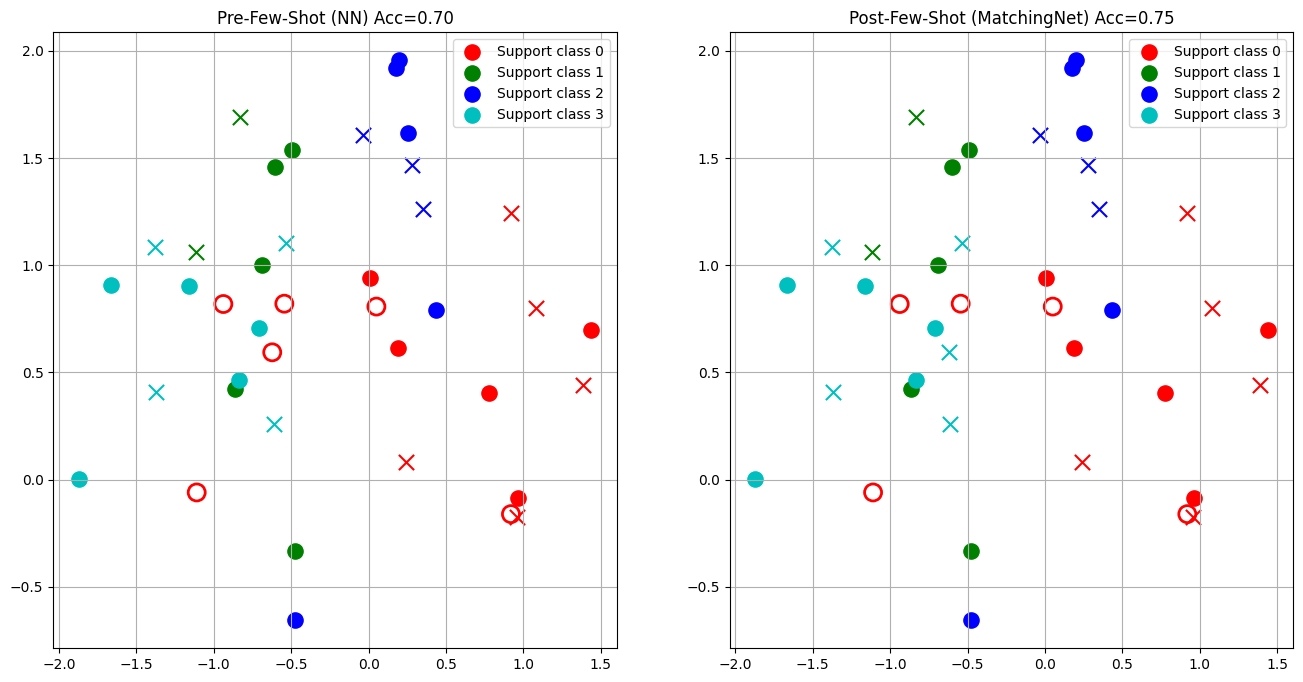

In [114]:
all_emb = torch.cat([support_emb, query_emb], dim=0).cpu().numpy()
all_labels = torch.cat([support_y, query_y], dim=0).cpu().numpy()

pre_preds_all = torch.cat([support_y, pre_preds], dim=0).cpu().numpy()
post_preds_all = torch.cat([support_y, post_preds], dim=0).cpu().numpy()

tsne = TSNE(n_components=2, random_state=42)
all_2d = tsne.fit_transform(all_emb)

support_2d = all_2d[:support_emb.size(0)]
query_2d = all_2d[support_emb.size(0):]

fig, axes = plt.subplots(1, 2, figsize=(16, 8))

def plot_tsne(ax, preds, title):
    for c in range(n_way):
        ax.scatter(
            support_2d[support_y.cpu() == c, 0],
            support_2d[support_y.cpu() == c, 1],
            color=colors[c],
            label=f"Support class {c}",
            s=120
        )
    for i in range(len(query_2d)):
        correct = preds[i] == query_y[i].item()
        if correct:
            ax.scatter(
                query_2d[i, 0],
                query_2d[i, 1],
                marker='x',
                color=colors[preds[i]],
                s=120
            )
        else:
            ax.scatter(
                query_2d[i, 0],
                query_2d[i, 1],
                marker='o',
                facecolors='none',
                edgecolors='r',
                s=150,
                linewidths=2
            )
    ax.set_title(title)
    ax.grid(True)

plot_tsne(axes[0], pre_preds.cpu().numpy(), f"Pre-Few-Shot (NN) Acc={pre_acc:.2f}")
plot_tsne(axes[1], post_preds.cpu().numpy(), f"Post-Few-Shot (MatchingNet) Acc={post_acc:.2f}")

axes[0].legend()
axes[1].legend()
plt.show()

#x-es - well classified, rings - wrongly classified

## Siamese Networks: Pairwise Similarity Learning

Siamese Networks are a few-shot learning approach that focuses on **learning a similarity function** between pairs of examples, rather than directly predicting class labels. This allows the model to generalize to unseen classes by comparing a query to known examples in a flexible way.

### Key Ideas

- **Pairwise Comparison:**  
  The network takes **two inputs at a time** and outputs a similarity score (or distance).  
  The question it answers is: “Are these two examples from the same class?”

- **Shared Embedding Network:**  
  Both inputs pass through the **same embedding network** \(f_\theta(\cdot)\), so that their embeddings live in the same feature space.

  Let \(x_1, x_2\) be two examples, then:
  $$
  h_1 = f_\theta(x_1), \quad h_2 = f_\theta(x_2)
  $$

- **Similarity Function:**  
  A distance or similarity metric (e.g., L1, L2, cosine) is applied to the embeddings:
  $$
  d(x_1, x_2) = \| h_1 - h_2 \|_1 \quad \text{or} \quad d(x_1, x_2) = \text{cosine}(h_1, h_2)
  $$

- **Training with Contrastive Loss:**  
  Pairs of examples are labeled as **similar (same class)** or **dissimilar (different class)**.  
  The network is trained to **minimize distance for similar pairs** and **maximize distance for dissimilar pairs**.  

  Example: Contrastive loss:
  $$
  \mathcal{L} = y \cdot d(x_1, x_2)^2 + (1-y) \cdot \max(0, m - d(x_1, x_2))^2
  $$
  where:  
  - \(y = 1\) if same class, else 0  
  - \(m\) = margin for dissimilar pairs  

- **Prediction:**  
  At test time, a query is compared to support examples.  
  The class of the **most similar support example** (nearest neighbor) is assigned to the query.

---

### Comparison with Prototypical and Matching Networks

| Feature | Prototypical Network | Matching Network | Siamese Network |
|---------|--------------------|----------------|----------------|
| Class Representation | Prototype (mean) | All support points | Pairwise embeddings |
| Query Comparison | Query ↔ Prototype | Query ↔ All support embeddings (attention) | Query ↔ Individual support example (nearest neighbor) |
| Flexibility | Limited | High | Very high, works for unseen classes |
| Complexity | Low | Medium | Medium |
| Training Target | Class centroids | Attention-weighted labels | Pairwise similarity (contrastive) |

---

### Advantages of Siamese Networks

- Can **generalize to unseen classes** easily.
- Learns a **class-agnostic similarity function**.
- Requires only **pair labels**, not full class information.
- Flexible: works even when only **one example per class** is available.

---

### Applications

- Signature verification (original application)
- Face verification (e.g., one-shot face ID)
- Medical imaging: compare patches or slides
- Baseline for metric-based few-shot methods


In [122]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as T
import random
from collections import defaultdict
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

torch.manual_seed(42)
device = "cuda" if torch.cuda.is_available() else "cpu"

n_way = 4
k_shot = 5
n_query = 5


In [123]:
transform = T.Compose([
    T.Resize(224),
    T.ToTensor(),
    T.Normalize(mean=[0.485, 0.456, 0.406],
                std=[0.229, 0.224, 0.225])
])

dataset = torchvision.datasets.CIFAR10(
    root="./data",
    train=False,
    download=True,
    transform=transform
)

# Build class -> indices mapping
class_to_indices = defaultdict(list)
for idx, (_, label) in enumerate(dataset):
    class_to_indices[label].append(idx)


In [124]:
selected_classes = random.sample(list(class_to_indices.keys()), n_way)

support_indices, query_indices = [], []
for c in selected_classes:
    inds = random.sample(class_to_indices[c], k_shot + n_query)
    support_indices += inds[:k_shot]
    query_indices   += inds[k_shot:]

support_x = torch.stack([dataset[i][0] for i in support_indices]).to(device)
support_y = torch.tensor([dataset[i][1] for i in support_indices]).to(device)
query_x   = torch.stack([dataset[i][0] for i in query_indices]).to(device)
query_y   = torch.tensor([dataset[i][1] for i in query_indices]).to(device)

# Map original labels to 0..n_way-1 for plotting
class_map = {c:i for i,c in enumerate(selected_classes)}
mapped_support_y = torch.tensor([class_map[int(y)] for y in support_y], device=device)
mapped_query_y   = torch.tensor([class_map[int(y)] for y in query_y], device=device)


In [126]:
backbone = torchvision.models.resnet18(weights=True)
backbone.fc = nn.Identity()
backbone = backbone.to(device)
backbone.eval()

with torch.no_grad():
    support_embeds = backbone(support_x)
    query_embeds   = backbone(query_x)

# L2 distance
dists = torch.cdist(query_embeds, support_embeds)
min_indices = dists.argmin(dim=1)
siamese_preds = mapped_support_y[min_indices]

siamese_acc = (siamese_preds == mapped_query_y).float().mean().item()
print(f"Siamese few-shot accuracy: {siamese_acc:.2f}")


/home/milosz/jupyter-env/lib/python3.13/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Siamese few-shot accuracy: 0.60


In [127]:
backbone = torchvision.models.resnet18(weights=True)
backbone.fc = nn.Identity()
backbone = backbone.to(device)
backbone.eval()

with torch.no_grad():
    support_embeds = backbone(support_x)
    query_embeds   = backbone(query_x)

# L2 distance
dists = torch.cdist(query_embeds, support_embeds)
min_indices = dists.argmin(dim=1)
siamese_preds = mapped_support_y[min_indices]

siamese_acc = (siamese_preds == mapped_query_y).float().mean().item()
print(f"Siamese few-shot accuracy: {siamese_acc:.2f}")


Siamese few-shot accuracy: 0.60


/tmp/ipykernel_143806/305413147.py:25: UserWarning: You passed a edgecolor/edgecolors ('r') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(
/tmp/ipykernel_143806/305413147.py:25: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


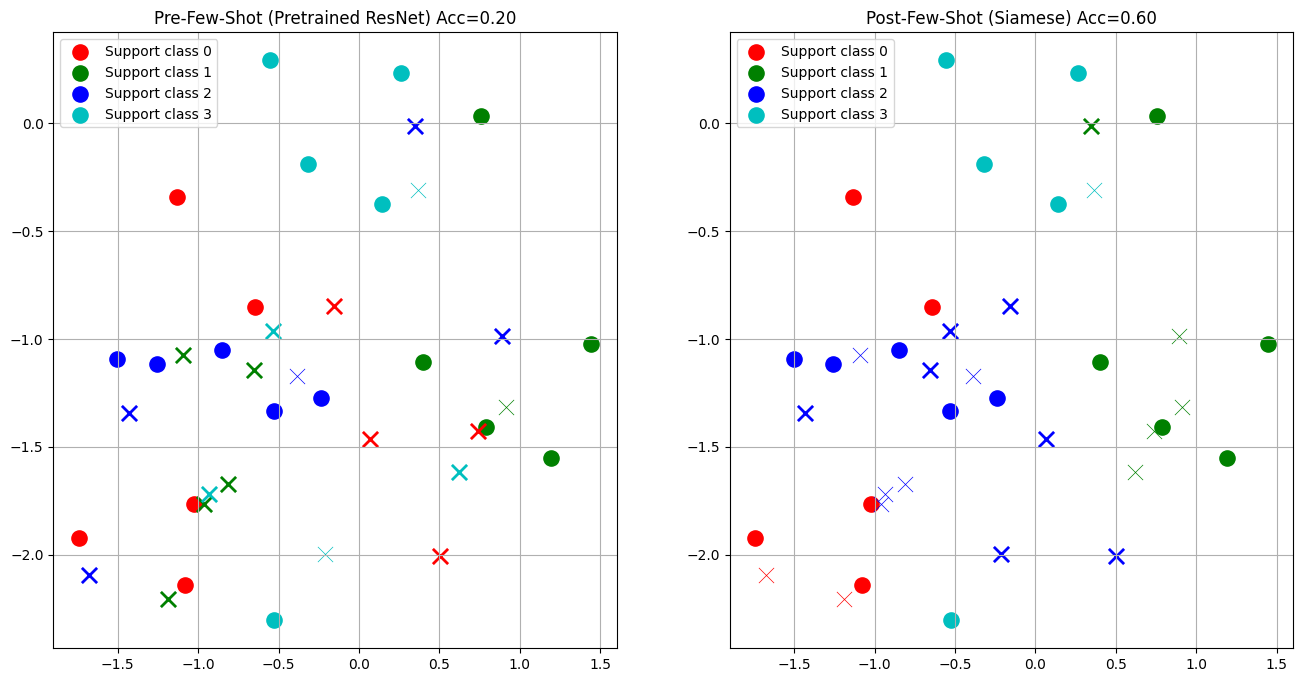

In [129]:
all_embeds = torch.cat([support_embeds, query_embeds], dim=0).cpu().numpy()
tsne = TSNE(n_components=2, random_state=42)
all_2d = tsne.fit_transform(all_embeds)

support_2d = all_2d[:len(support_embeds)]
query_2d   = all_2d[len(support_embeds):]

colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k', 'orange'][:n_way]

fig, axes = plt.subplots(1, 2, figsize=(16, 8))

def plot_tsne(ax, preds, title):
    # Support points
    for c in range(n_way):
        ax.scatter(
            support_2d[mapped_support_y.cpu() == c, 0],
            support_2d[mapped_support_y.cpu() == c, 1],
            color=colors[c],
            label=f'Support class {c}',
            s=120
        )
    # Query points
    for i in range(len(query_2d)):
        correct = preds[i] == mapped_query_y[i]
        ax.scatter(
            query_2d[i, 0],
            query_2d[i, 1],
            marker='x',
            color=colors[preds[i]],
            s=120,
            edgecolor='r' if not correct else 'k',
            linewidth=2 if not correct else 0.5
        )
    ax.set_title(title)
    ax.grid(True)

plot_tsne(axes[0], pre_preds, f"Pre-Few-Shot (Pretrained ResNet) Acc={pre_acc:.2f}")
plot_tsne(axes[1], siamese_preds, f"Post-Few-Shot (Siamese) Acc={siamese_acc:.2f}")

axes[0].legend()
axes[1].legend()
plt.show()


# Meta-Learning Methods: Learning to Learn

W poprzednich sekcjach poznaliśmy metody metric-based (Prototypical Networks, Matching Networks), które uczą się **dobrej przestrzeni embeddingów** i klasyfikują nowe przykłady przez porównywanie odległości.

W tej sekcji poznamy podejście **meta-learning**, które idzie o krok dalej: zamiast uczyć się tylko reprezentacji, uczymy się **jak szybko adaptować model do nowego zadania**.

---

## Czym jest Meta-Learning?

**Meta-learning** (uczenie się uczenia) to podejście, w którym model uczy się **algorytmu uczenia** lub **dobrej inicjalizacji wag**, tak aby po zobaczeniu kilku przykładów z nowego zadania mógł się szybko zaadaptować.

**Kluczowa różnica:**
- **Metric-based FSL:** Uczymy embeddingi → porównujemy odległości → brak zmiany wag podczas inference
- **Meta-learning:** Uczymy inicjalizację → kilka kroków gradient descent → wagi się zmieniają dla każdego nowego zadania

---

## Podstawowe pojęcia

### Task / Episode
- **Task (zadanie):** Jeden problem few-shot, np. klasyfikacja 3 klas po 5 przykładów każda
- **Episode:** Jedna iteracja treningowa, w której losujemy nowy task

### Inner Loop (pętla wewnętrzna)
- Adaptacja modelu do **konkretnego taska**
- Kilka kroków gradient descent na support set
- Wagi modelu są **tymczasowo** modyfikowane

### Outer Loop (pętla zewnętrzna)
- Aktualizacja **meta-parametrów** (inicjalizacji)
- Optymalizujemy tak, aby po inner loop model dobrze działał na query set
- To jest "uczenie się jak się uczyć"

---

## Intuicja

Wyobraź sobie, że szukasz **punktu startowego w przestrzeni wag**, z którego:
- Po kilku krokach w dowolnym kierunku (różne taski)
- Zawsze dojdziesz do dobrego rozwiązania

Meta-learning znajduje taki "uniwersalny" punkt startowy.

## Problem, który rozwiązuje Meta-Learning

### Kiedy metric-based nie wystarcza?

Metody oparte na metrykach (ProtoNet, Matching Networks) działają świetnie, gdy:
- Pretrenowany encoder tworzy dobre embeddingi
- Klasy są dobrze separowalne w przestrzeni embeddingów

**Ale co jeśli:**
- Nowe zadanie wymaga innej reprezentacji niż ta nauczona podczas pretrainingu?
- Klasy są bardzo podobne i wymagają subtelnych rozróżnień?
- Mamy do czynienia z zadaniem innym niż klasyfikacja (np. regresja)?

### Kiedy potrzebna jest adaptacja wag?

- Gdy proste porównywanie odległości nie wystarcza
- Gdy chcemy, aby model **naprawdę się uczył** z nowych przykładów
- Gdy zadania są bardzo różnorodne

**Meta-learning pozwala na prawdziwą adaptację** – model zmienia swoje wagi w odpowiedzi na nowe dane.

## MAML – Model-Agnostic Meta-Learning

**MAML** (Finn et al., 2017) to jedna z najbardziej wpływowych metod meta-learningu.

### Główna idea

1. **Znajdź dobrą inicjalizację wag** $\theta$
2. Dla każdego nowego taska: wykonaj kilka kroków gradient descent
3. Po tych krokach model powinien dobrze działać na query set

### Dlaczego "Model-Agnostic"?

MAML działa z **dowolną architekturą** i **dowolną funkcją straty** – wystarczy, że model jest różniczkowalny.

---

### Pseudokod MAML

```
Inicjalizuj meta-parametry θ

for each meta-iteration:
    Wylosuj batch tasków T₁, T₂, ..., Tₙ
    
    for each task Tᵢ:
        # INNER LOOP (adaptacja)
        Pobierz support set Sᵢ i query set Qᵢ
        θ'ᵢ = θ - α · ∇θ L(θ, Sᵢ)     # jeden lub kilka kroków GD
        
        # Oblicz loss na query set z zaadaptowanymi wagami
        Lᵢ = L(θ'ᵢ, Qᵢ)
    
    # OUTER LOOP (meta-update)
    θ = θ - β · ∇θ Σᵢ Lᵢ              # gradient przez gradienty!
```

**Kluczowe:**
- $\alpha$ – learning rate dla inner loop (adaptacji)
- $\beta$ – learning rate dla outer loop (meta-update)
- Gradient w outer loop przechodzi **przez** operację inner loop

In [ ]:
# MAML - Minimalny przykład na danych syntetycznych 2D
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import copy

torch.manual_seed(42)

# Prosty model klasyfikacji binarnej
class SimpleClassifier(nn.Module):
    def __init__(self, input_dim=2, hidden_dim=32):
        super().__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        self.fc3 = nn.Linear(hidden_dim, 2)
    
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        return self.fc3(x)

def generate_task(n_support=5, n_query=10):
    """
    Generuje jeden task: klasyfikacja 2 gaussów.
    Każdy task ma losowe centrum klas - GWARANTUJEMY SEPARACJĘ.
    """
    # Losowy kierunek separacji
    angle = torch.rand(1) * 2 * 3.14159
    direction = torch.tensor([torch.cos(angle), torch.sin(angle)]).squeeze()
    
    # Centra oddalone od siebie
    offset = torch.randn(2) * 2  # losowe przesunięcie całego taska
    center0 = offset - direction * 2
    center1 = offset + direction * 2
    
    # Support set
    support_x0 = torch.randn(n_support, 2) * 0.5 + center0
    support_x1 = torch.randn(n_support, 2) * 0.5 + center1
    support_x = torch.cat([support_x0, support_x1], dim=0)
    support_y = torch.cat([torch.zeros(n_support), torch.ones(n_support)]).long()
    
    # Query set
    query_x0 = torch.randn(n_query, 2) * 0.5 + center0
    query_x1 = torch.randn(n_query, 2) * 0.5 + center1
    query_x = torch.cat([query_x0, query_x1], dim=0)
    query_y = torch.cat([torch.zeros(n_query), torch.ones(n_query)]).long()
    
    # Shuffle
    perm_s = torch.randperm(len(support_y))
    perm_q = torch.randperm(len(query_y))
    
    return support_x[perm_s], support_y[perm_s], query_x[perm_q], query_y[perm_q]

In [ ]:
def functional_forward(x, params):
    """
    Forward pass z podanymi wagami (functional style).
    """
    x = F.linear(x, params['fc1.weight'], params['fc1.bias'])
    x = F.relu(x)
    x = F.linear(x, params['fc2.weight'], params['fc2.bias'])
    x = F.relu(x)
    x = F.linear(x, params['fc3.weight'], params['fc3.bias'])
    return x

def inner_loop_update(params, support_x, support_y, inner_lr, inner_steps):
    """
    Inner loop: adaptacja modelu na support set.
    Zwraca zaadaptowane wagi (jako słownik).
    """
    adapted_params = {k: v.clone() for k, v in params.items()}
    
    for _ in range(inner_steps):
        logits = functional_forward(support_x, adapted_params)
        loss = F.cross_entropy(logits, support_y)
        
        grads = torch.autograd.grad(loss, adapted_params.values(), create_graph=True)
        
        adapted_params = {
            k: v - inner_lr * g 
            for (k, v), g in zip(adapted_params.items(), grads)
        }
    
    return adapted_params

In [ ]:
# Trening MAML
model = SimpleClassifier()
meta_optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

inner_lr = 0.5       # wyższy learning rate dla inner loop
inner_steps = 5      # liczba kroków adaptacji
n_tasks = 4          # liczba tasków w każdej meta-iteracji
n_meta_iterations = 1000

losses = []

for meta_iter in range(n_meta_iterations):
    meta_loss = 0.0
    
    # Pobierz aktualne parametry modelu
    params = {k: v for k, v in model.named_parameters()}
    
    for _ in range(n_tasks):
        # Generuj nowy task
        support_x, support_y, query_x, query_y = generate_task()
        
        # Inner loop: adaptacja na support set
        adapted_params = inner_loop_update(params, support_x, support_y, inner_lr, inner_steps)
        
        # Oblicz loss na query set z zaadaptowanymi wagami
        query_logits = functional_forward(query_x, adapted_params)
        task_loss = F.cross_entropy(query_logits, query_y)
        
        meta_loss += task_loss
    
    meta_loss = meta_loss / n_tasks
    
    # Outer loop: meta-update
    meta_optimizer.zero_grad()
    meta_loss.backward()
    meta_optimizer.step()
    
    losses.append(meta_loss.item())
    
    if meta_iter % 200 == 0:
        print(f"Meta-iteration {meta_iter}, Meta-loss: {meta_loss.item():.4f}")

print("Trening zakończony!")

Meta-iteration 0, Meta-loss: 0.0502
Meta-iteration 200, Meta-loss: 0.2332
Meta-iteration 400, Meta-loss: 0.0804
Meta-iteration 600, Meta-loss: 0.1864
Meta-iteration 800, Meta-loss: 0.0827
Trening zakończony!


In [ ]:
# Ewaluacja: porównanie przed i po adaptacji
def evaluate_model(model, support_x, support_y, query_x, query_y, inner_lr, inner_steps):
    """
    Zwraca accuracy przed i po adaptacji.
    """
    params = {k: v.clone() for k, v in model.named_parameters()}
    
    # Przed adaptacją
    with torch.no_grad():
        logits_before = functional_forward(query_x, params)
        preds_before = logits_before.argmax(dim=1)
        acc_before = (preds_before == query_y).float().mean().item()
    
    # Po adaptacji (bez create_graph dla ewaluacji)
    adapted_params = {k: v.clone() for k, v in params.items()}
    for _ in range(inner_steps):
        logits = functional_forward(support_x, adapted_params)
        loss = F.cross_entropy(logits, support_y)
        grads = torch.autograd.grad(loss, adapted_params.values())
        adapted_params = {
            k: v - inner_lr * g 
            for (k, v), g in zip(adapted_params.items(), grads)
        }
    
    with torch.no_grad():
        logits_after = functional_forward(query_x, adapted_params)
        preds_after = logits_after.argmax(dim=1)
        acc_after = (preds_after == query_y).float().mean().item()
    
    return acc_before, acc_after

# Test na kilku nowych taskach
print("Ewaluacja na nowych taskach:")
print("-" * 40)

accs_before = []
accs_after = []

for i in range(10):
    support_x, support_y, query_x, query_y = generate_task()
    acc_before, acc_after = evaluate_model(
        model, support_x, support_y, query_x, query_y, inner_lr, inner_steps
    )
    accs_before.append(acc_before)
    accs_after.append(acc_after)
    print(f"Task {i+1}: Before={acc_before:.2f}, After={acc_after:.2f}")

print("-" * 40)
print(f"Średnia przed adaptacją: {sum(accs_before)/len(accs_before):.2f}")
print(f"Średnia po adaptacji:    {sum(accs_after)/len(accs_after):.2f}")

Ewaluacja na nowych taskach:
----------------------------------------
Task 1: Before=1.00, After=0.50
Task 2: Before=0.95, After=0.75
Task 3: Before=0.15, After=1.00
Task 4: Before=0.00, After=1.00
Task 5: Before=0.35, After=1.00
Task 6: Before=0.00, After=1.00
Task 7: Before=0.00, After=1.00
Task 8: Before=0.00, After=1.00
Task 9: Before=0.95, After=1.00
Task 10: Before=1.00, After=1.00
----------------------------------------
Średnia przed adaptacją: 0.44
Średnia po adaptacji:    0.93


## Co tak naprawdę się tutaj uczy?

### Interpretacja geometryczna

MAML szuka takiego **punktu startowego w przestrzeni wag** $\theta$, że:

1. Dla **każdego możliwego taska** $T_i$
2. Po wykonaniu **kilku kroków gradient descent** w kierunku minimalizacji straty na $T_i$
3. Otrzymujemy **dobre rozwiązanie** dla tego taska

**Wizualnie:**
- Wyobraź sobie przestrzeń wag jako wielowymiarową powierzchnię
- Każdy task to "dolina" w tej powierzchni (lokalne minimum)
- MAML szuka punktu, z którego **łatwo zjeżdżamy** do każdej doliny

```
        θ* (MAML init)
           /  |  \
          /   |   \
         ↓    ↓    ↓
       θ₁'  θ₂'  θ₃'   (po adaptacji na różne taski)
```

### Dlaczego to działa?

- Zwykły trening daje dobre rozwiązanie dla **jednego zadania**
- MAML daje **dobre punkty startowe** dla **wielu zadań**
- Po kilku krokach GD jesteśmy blisko optymalnego rozwiązania dla nowego taska

### Gradient przez gradient

Kluczowa innowacja MAML: gradient w outer loop przechodzi **przez** operację inner loop.

To znaczy, że optymalizujemy:
$$\theta \leftarrow \theta - \beta \nabla_\theta \mathcal{L}(\theta - \alpha \nabla_\theta \mathcal{L}(\theta, S), Q)$$

Dzięki temu model uczy się, jak **zmieniać swoje wagi** w odpowiedzi na nowe dane.

## Inne metody Meta-Learning

### FOMAML (First-Order MAML)

- Uproszczona wersja MAML
- Ignoruje drugie pochodne (gradient przez gradient)
- Szybsza obliczeniowo, często działa prawie tak dobrze

```python
# MAML: gradient przez adaptację
grads = torch.autograd.grad(..., create_graph=True)

# FOMAML: ignorujemy drugą pochodną
grads = torch.autograd.grad(..., create_graph=False)
```

---

### Reptile

- Jeszcze prostsza alternatywa
- Nie wymaga gradientów przez gradient
- Algorytm:
  1. Wylosuj task
  2. Zrób kilka kroków SGD na tym tasku: $\theta \to \tilde{\theta}$
  3. Meta-update: $\theta \leftarrow \theta + \epsilon(\tilde{\theta} - \theta)$

**Intuicja:** Przesuwaj inicjalizację w kierunku rozwiązań.

---

### Meta-SGD

- Rozszerzenie MAML
- Oprócz inicjalizacji $\theta$, uczy się też **learning rate** dla każdego parametru
- Pozwala na bardziej precyzyjną adaptację

---

### LSTM Meta-Learner

- Zamiast gradient descent w inner loop
- Używa **sieci rekurencyjnej (LSTM)** do przewidywania aktualizacji wag
- Uczy się algorytmu uczenia jako funkcji

## FOMAML: First-Order MAML - Szczegóły

### Dlaczego FOMAML?

Pełny MAML wymaga obliczania **drugich pochodnych** (Hessian), co jest:
- Kosztowne obliczeniowo
- Wymaga dużo pamięci (przechowywanie grafu obliczeniowego)
- Może być niestabilne numerycznie

**FOMAML** (First-Order MAML) to aproksymacja, która **ignoruje drugie pochodne**.

### Matematycznie

W pełnym MAML optymalizujemy:
$$\theta \leftarrow \theta - \beta \nabla_\theta \mathcal{L}(\theta - \alpha \nabla_\theta \mathcal{L}(\theta, S), Q)$$

To wymaga obliczenia $\frac{\partial^2 \mathcal{L}}{\partial \theta^2}$ (Hessian).

W FOMAML aproksymujemy:
$$\theta \leftarrow \theta - \beta \nabla_{\theta'} \mathcal{L}(\theta', Q)$$

gdzie $\theta' = \theta - \alpha \nabla_\theta \mathcal{L}(\theta, S)$, ale **traktujemy $\theta'$ jako stałą** względem $\theta$.

### Intuicja

- MAML: "Jak zmienić inicjalizację, żeby adaptacja działała lepiej?"
- FOMAML: "W którą stronę poszła adaptacja? Idźmy tam!"

### Kiedy FOMAML wystarczy?

- Gdy taski są podobne do siebie
- Gdy zależy nam na szybkości treningu
- W praktyce często działa **prawie tak dobrze** jak pełny MAML

In [ ]:
# FOMAML - Implementacja
# Różnica: create_graph=False w inner loop

def inner_loop_fomaml(params, support_x, support_y, inner_lr, inner_steps):
    """
    Inner loop dla FOMAML - BEZ drugich pochodnych.
    """
    adapted_params = {k: v.clone() for k, v in params.items()}
    
    for _ in range(inner_steps):
        logits = functional_forward(support_x, adapted_params)
        loss = F.cross_entropy(logits, support_y)
        
        # KLUCZOWA RÓŻNICA: create_graph=False
        grads = torch.autograd.grad(loss, adapted_params.values(), create_graph=False)
        
        # Detach - upewniamy się, że nie ma grafu
        adapted_params = {
            k: (v - inner_lr * g).detach().requires_grad_(True)
            for (k, v), g in zip(adapted_params.items(), grads)
        }
    
    return adapted_params

# Trening FOMAML
fomaml_model = SimpleClassifier()
fomaml_optimizer = torch.optim.Adam(fomaml_model.parameters(), lr=0.001)

fomaml_losses = []
n_fomaml_iterations = 1000

print("Trening FOMAML:")
for meta_iter in range(n_fomaml_iterations):
    meta_loss = 0.0
    params = {k: v for k, v in fomaml_model.named_parameters()}
    
    for _ in range(n_tasks):
        support_x, support_y, query_x, query_y = generate_task()
        
        # Inner loop BEZ drugich pochodnych
        adapted_params = inner_loop_fomaml(params, support_x, support_y, inner_lr, inner_steps)
        
        # Query loss - to JEST różniczkowalne względem adapted_params
        query_logits = functional_forward(query_x, adapted_params)
        task_loss = F.cross_entropy(query_logits, query_y)
        
        meta_loss += task_loss
    
    meta_loss = meta_loss / n_tasks
    
    fomaml_optimizer.zero_grad()
    meta_loss.backward()
    fomaml_optimizer.step()
    
    fomaml_losses.append(meta_loss.item())
    
    if meta_iter % 100 == 0:
        print(f"  Iteration {meta_iter}, Loss: {meta_loss.item():.4f}")

print("FOMAML trening zakończony!")

Trening FOMAML:
  Iteration 0, Loss: 0.0349
  Iteration 100, Loss: 0.0524
  Iteration 200, Loss: 0.1775
  Iteration 300, Loss: 0.3032
  Iteration 400, Loss: 0.3799
  Iteration 500, Loss: 0.0568
  Iteration 600, Loss: 0.0418
  Iteration 700, Loss: 0.1707
  Iteration 800, Loss: 0.1334
  Iteration 900, Loss: 0.1098
FOMAML trening zakończony!


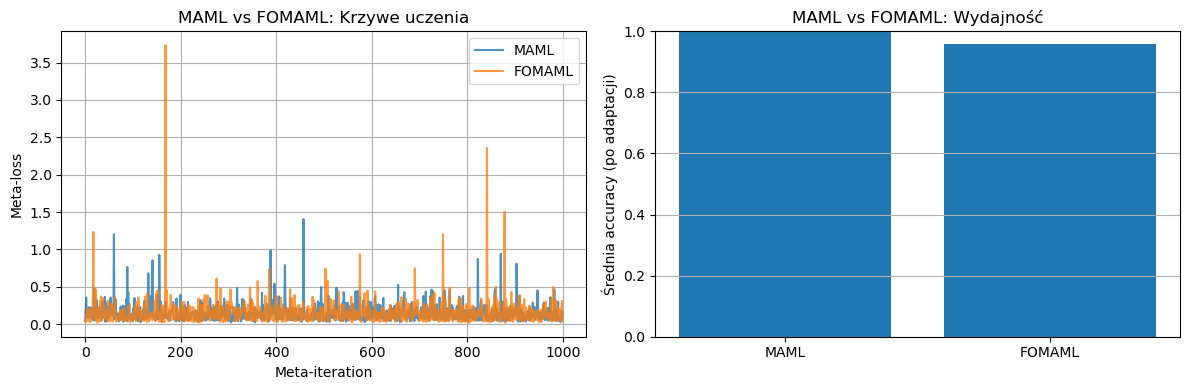

MAML średnia accuracy:   0.997
FOMAML średnia accuracy: 0.960


In [ ]:
# Porównanie MAML vs FOMAML
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(losses, label='MAML', alpha=0.8)
plt.plot(fomaml_losses, label='FOMAML', alpha=0.8)
plt.xlabel('Meta-iteration')
plt.ylabel('Meta-loss')
plt.title('MAML vs FOMAML: Krzywe uczenia')
plt.legend()
plt.grid(True)

# Ewaluacja obu modeli
maml_accs = []
fomaml_accs = []

for _ in range(20):
    sx, sy, qx, qy = generate_task()
    
    _, maml_acc = evaluate_model(model, sx, sy, qx, qy, inner_lr, inner_steps)
    _, fomaml_acc = evaluate_model(fomaml_model, sx, sy, qx, qy, inner_lr, inner_steps)
    
    maml_accs.append(maml_acc)
    fomaml_accs.append(fomaml_acc)

plt.subplot(1, 2, 2)
plt.bar([0, 1], [sum(maml_accs)/len(maml_accs), sum(fomaml_accs)/len(fomaml_accs)])
plt.xticks([0, 1], ['MAML', 'FOMAML'])
plt.ylabel('Średnia accuracy (po adaptacji)')
plt.title('MAML vs FOMAML: Wydajność')
plt.ylim(0, 1)
plt.grid(True, axis='y')

plt.tight_layout()
plt.show()

print(f"MAML średnia accuracy:   {sum(maml_accs)/len(maml_accs):.3f}")
print(f"FOMAML średnia accuracy: {sum(fomaml_accs)/len(fomaml_accs):.3f}")

## Reptile: Najprostsza metoda meta-learningu

### Algorytm Reptile (Nichol et al., 2018)

Reptile jest **znacznie prostszy** niż MAML:

1. Zainicjalizuj parametry $\theta$
2. Dla każdej iteracji:
   - Wylosuj task $T$
   - Skopiuj parametry: $\tilde{\theta} = \theta$
   - Wykonaj $k$ kroków SGD na tasku $T$: $\tilde{\theta} \to \tilde{\theta}'$
   - Meta-update: $\theta \leftarrow \theta + \epsilon(\tilde{\theta}' - \theta)$

### Pseudokod

```
θ = initial_params

for iteration in range(n_iterations):
    task = sample_task()
    θ_copy = copy(θ)
    
    # Zwykły trening na tasku
    for step in range(k_steps):
        loss = compute_loss(θ_copy, task.support)
        θ_copy = θ_copy - α * grad(loss)
    
    # Meta-update: przesuń θ w kierunku θ_copy
    θ = θ + ε * (θ_copy - θ)
```

### Dlaczego to działa?

**Intuicja geometryczna:**
- Każdy task "ciągnie" inicjalizację w swoim kierunku
- Po wielu iteracjach, $\theta$ zbliża się do punktu równowagi
- Ten punkt jest blisko **wszystkich** optymalnych rozwiązań

**Matematyczna interpretacja:**
- Reptile aproksymuje gradient po oczekiwanej wartości tasków
- Działa podobnie do FOMAML, ale jest jeszcze prostszy

### Zalety Reptile

| Cecha | MAML | FOMAML | Reptile |
|-------|------|--------|---------|
| Drugie pochodne | ✅ Tak | ❌ Nie | ❌ Nie |
| Wymaga query set | ✅ Tak | ✅ Tak | ❌ Nie |
| Złożoność implementacji | Wysoka | Średnia | Niska |
| Zużycie pamięci | Wysokie | Średnie | Niskie |

In [ ]:
# Reptile - Implementacja

def reptile_inner_loop(model, support_x, support_y, inner_lr, inner_steps):
    """
    Inner loop dla Reptile - zwykły SGD, zwraca zaadaptowany model.
    """
    # Kopiujemy model
    adapted_model = SimpleClassifier()
    adapted_model.load_state_dict(model.state_dict())
    
    optimizer = torch.optim.SGD(adapted_model.parameters(), lr=inner_lr)
    
    for _ in range(inner_steps):
        optimizer.zero_grad()
        logits = adapted_model(support_x)
        loss = F.cross_entropy(logits, support_y)
        loss.backward()
        optimizer.step()
    
    return adapted_model

# Trening Reptile
reptile_model = SimpleClassifier()
reptile_lr = 0.001  # meta learning rate (epsilon)
inner_lr_reptile = 0.5
inner_steps_reptile = 10  # więcej kroków niż w MAML
n_reptile_iterations = 1000

reptile_losses = []

print("Trening Reptile:")
for meta_iter in range(n_reptile_iterations):
    meta_loss = 0.0
    
    # Wylosuj task (w Reptile nie potrzebujemy query set!)
    support_x, support_y, _, _ = generate_task()
    
    # Inner loop - zwykły SGD
    adapted_model = reptile_inner_loop(
        reptile_model, support_x, support_y, 
        inner_lr_reptile, inner_steps_reptile
    )
    
    # Meta-update: θ = θ + ε(θ' - θ)
    with torch.no_grad():
        for (name, param), (_, adapted_param) in zip(
            reptile_model.named_parameters(), 
            adapted_model.named_parameters()
        ):
            param.data += reptile_lr * (adapted_param.data - param.data)
    
    # Opcjonalnie: śledź loss dla wizualizacji
    if meta_iter % 50 == 0:
        # Sprawdź na nowym tasku
        sx, sy, qx, qy = generate_task()
        adapted = reptile_inner_loop(reptile_model, sx, sy, inner_lr_reptile, 5)
        with torch.no_grad():
            loss = F.cross_entropy(adapted(qx), qy).item()
        reptile_losses.append(loss)
        
        if meta_iter % 200 == 0:
            print(f"  Iteration {meta_iter}, Test loss: {loss:.4f}")

print("Reptile trening zakończony!")

Trening Reptile:
  Iteration 0, Test loss: 0.0324
  Iteration 200, Test loss: 0.0240
  Iteration 400, Test loss: 0.0356
  Iteration 600, Test loss: 0.0244
  Iteration 800, Test loss: 0.6349
Reptile trening zakończony!


In [ ]:
# Ewaluacja Reptile
print("\nEwaluacja Reptile na nowych taskach:")
print("-" * 40)

reptile_accs_before = []
reptile_accs_after = []

for i in range(10):
    support_x, support_y, query_x, query_y = generate_task()
    
    # Przed adaptacją
    with torch.no_grad():
        logits = reptile_model(query_x)
        acc_before = (logits.argmax(1) == query_y).float().mean().item()
    
    # Po adaptacji
    adapted = reptile_inner_loop(reptile_model, support_x, support_y, inner_lr_reptile, 5)
    with torch.no_grad():
        logits = adapted(query_x)
        acc_after = (logits.argmax(1) == query_y).float().mean().item()
    
    reptile_accs_before.append(acc_before)
    reptile_accs_after.append(acc_after)
    print(f"Task {i+1}: Before={acc_before:.2f}, After={acc_after:.2f}")

print("-" * 40)
print(f"Reptile średnia przed adaptacją: {sum(reptile_accs_before)/len(reptile_accs_before):.2f}")
print(f"Reptile średnia po adaptacji:    {sum(reptile_accs_after)/len(reptile_accs_after):.2f}")


Ewaluacja Reptile na nowych taskach:
----------------------------------------
Task 1: Before=0.00, After=1.00
Task 2: Before=0.50, After=0.50
Task 3: Before=0.80, After=1.00
Task 4: Before=0.00, After=1.00
Task 5: Before=0.40, After=0.95
Task 6: Before=0.70, After=0.50
Task 7: Before=0.50, After=1.00
Task 8: Before=0.25, After=1.00
Task 9: Before=0.65, After=1.00
Task 10: Before=0.30, After=1.00
----------------------------------------
Reptile średnia przed adaptacją: 0.41
Reptile średnia po adaptacji:    0.89


## Meta-SGD: Uczenie się learning rate'ów

### Motywacja

W MAML używamy **jednego learning rate** $\alpha$ dla wszystkich parametrów w inner loop. Ale:
- Różne warstwy mogą wymagać różnych prędkości adaptacji
- Niektóre parametry są ważniejsze dla szybkiej adaptacji

### Idea Meta-SGD (Li et al., 2017)

Zamiast uczyć się tylko inicjalizacji $\theta$, uczymy się również **wektora learning rate'ów** $\alpha$:

$$\theta' = \theta - \alpha \odot \nabla_\theta \mathcal{L}(\theta, S)$$

gdzie $\odot$ oznacza mnożenie element-wise, a $\alpha$ ma **taki sam kształt jak $\theta$**.

### Co się uczy?

1. **Inicjalizacja wag** $\theta$ - jak w MAML
2. **Learning rate dla każdego parametru** $\alpha_i$ - nowe!

### Zalety

- Bardziej elastyczna adaptacja
- Automatyczne odkrywanie, które parametry są ważne
- Może działać lepiej niż MAML przy mniejszej liczbie kroków adaptacji

### Pseudokod

```python
# Inicjalizacja
theta = init_weights()
alpha = init_learning_rates()  # np. wszystkie = 0.01

for iteration:
    task = sample_task()
    
    # Inner loop z per-parameter learning rates
    theta_prime = theta - alpha * grad(loss(theta, support))
    
    # Outer loop - aktualizuj ZARÓWNO theta JAK I alpha
    meta_loss = loss(theta_prime, query)
    theta = theta - beta * grad(meta_loss, theta)
    alpha = alpha - beta * grad(meta_loss, alpha)
```

In [ ]:
# Meta-SGD - Implementacja

class MetaSGDClassifier(nn.Module):
    """
    Model z uczącymi się learning rate'ami dla każdego parametru.
    """
    def __init__(self, input_dim=2, hidden_dim=32):
        super().__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        self.fc3 = nn.Linear(hidden_dim, 2)
        
        # Learning rates jako parametry - jeden LR per parametr
        # Inicjalizujemy małymi wartościami
        self.lr_fc1_w = nn.Parameter(torch.ones_like(self.fc1.weight) * 0.01)
        self.lr_fc1_b = nn.Parameter(torch.ones_like(self.fc1.bias) * 0.01)
        self.lr_fc2_w = nn.Parameter(torch.ones_like(self.fc2.weight) * 0.01)
        self.lr_fc2_b = nn.Parameter(torch.ones_like(self.fc2.bias) * 0.01)
        self.lr_fc3_w = nn.Parameter(torch.ones_like(self.fc3.weight) * 0.01)
        self.lr_fc3_b = nn.Parameter(torch.ones_like(self.fc3.bias) * 0.01)
    
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        return self.fc3(x)
    
    def get_params_and_lrs(self):
        """Zwraca pary (parametr, learning_rate)."""
        return [
            (self.fc1.weight, self.lr_fc1_w),
            (self.fc1.bias, self.lr_fc1_b),
            (self.fc2.weight, self.lr_fc2_w),
            (self.fc2.bias, self.lr_fc2_b),
            (self.fc3.weight, self.lr_fc3_w),
            (self.fc3.bias, self.lr_fc3_b),
        ]

def meta_sgd_forward(x, params):
    """Forward pass z podanymi wagami."""
    x = F.linear(x, params[0], params[1])
    x = F.relu(x)
    x = F.linear(x, params[2], params[3])
    x = F.relu(x)
    x = F.linear(x, params[4], params[5])
    return x

def meta_sgd_inner_loop(model, support_x, support_y, inner_steps):
    """
    Inner loop dla Meta-SGD z per-parameter learning rates.
    """
    params_and_lrs = model.get_params_and_lrs()
    
    # Wyciągnij parametry i learning rates
    adapted_params = [p.clone() for p, _ in params_and_lrs]
    learning_rates = [lr for _, lr in params_and_lrs]
    
    for _ in range(inner_steps):
        logits = meta_sgd_forward(support_x, adapted_params)
        loss = F.cross_entropy(logits, support_y)
        
        grads = torch.autograd.grad(loss, adapted_params, create_graph=True)
        
        # Aktualizacja z per-parameter learning rates
        adapted_params = [
            p - lr * g 
            for p, lr, g in zip(adapted_params, learning_rates, grads)
        ]
    
    return adapted_params

# Trening Meta-SGD
meta_sgd_model = MetaSGDClassifier()
meta_sgd_optimizer = torch.optim.Adam(meta_sgd_model.parameters(), lr=0.001)

meta_sgd_losses = []
n_meta_sgd_iterations = 1000

print("Trening Meta-SGD:")
for meta_iter in range(n_meta_sgd_iterations):
    meta_loss = 0.0
    
    for _ in range(n_tasks):
        support_x, support_y, query_x, query_y = generate_task()
        
        adapted_params = meta_sgd_inner_loop(meta_sgd_model, support_x, support_y, inner_steps=3)
        
        query_logits = meta_sgd_forward(query_x, adapted_params)
        task_loss = F.cross_entropy(query_logits, query_y)
        
        meta_loss += task_loss
    
    meta_loss = meta_loss / n_tasks
    
    meta_sgd_optimizer.zero_grad()
    meta_loss.backward()
    meta_sgd_optimizer.step()
    
    meta_sgd_losses.append(meta_loss.item())
    
    if meta_iter % 100 == 0:
        print(f"  Iteration {meta_iter}, Loss: {meta_loss.item():.4f}")

print("Meta-SGD trening zakończony!")

Trening Meta-SGD:
  Iteration 0, Loss: 0.6710
  Iteration 100, Loss: 0.2948
  Iteration 200, Loss: 0.1210
  Iteration 300, Loss: 0.0985
  Iteration 400, Loss: 0.1602
  Iteration 500, Loss: 0.0792
  Iteration 600, Loss: 0.0480
  Iteration 700, Loss: 0.1745
  Iteration 800, Loss: 0.0444
  Iteration 900, Loss: 0.0440
Meta-SGD trening zakończony!



Nauczone learning rates w Meta-SGD:
--------------------------------------------------
FC1 weights LR: min=-0.0670, max=0.2466, mean=0.1050
FC2 weights LR: min=-0.1809, max=0.4649, mean=0.1003
FC3 weights LR: min=-0.0521, max=0.4281, mean=0.1490


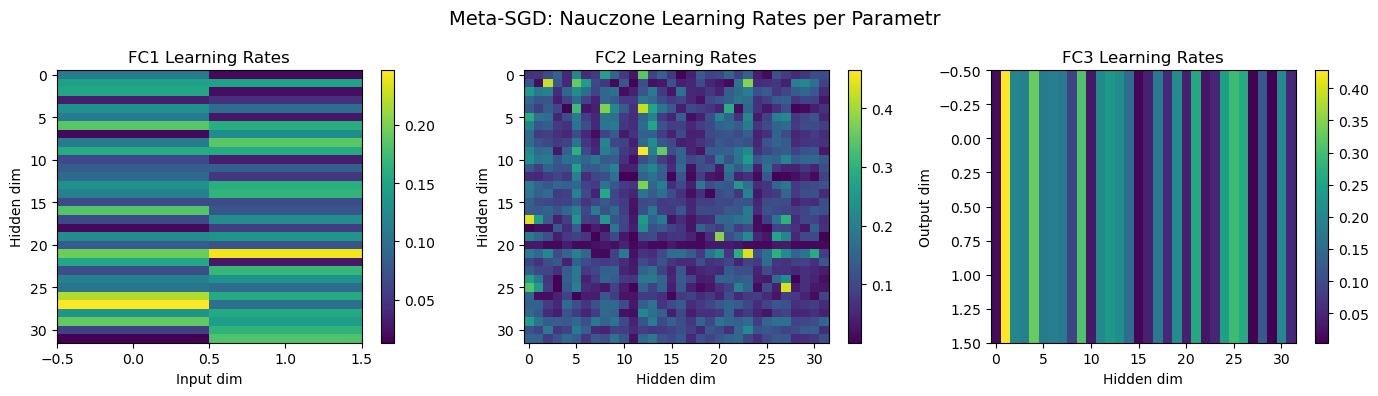

In [ ]:
# Wizualizacja nauczonych learning rate'ów
print("\nNauczone learning rates w Meta-SGD:")
print("-" * 50)

with torch.no_grad():
    print(f"FC1 weights LR: min={meta_sgd_model.lr_fc1_w.min():.4f}, "
          f"max={meta_sgd_model.lr_fc1_w.max():.4f}, "
          f"mean={meta_sgd_model.lr_fc1_w.mean():.4f}")
    print(f"FC2 weights LR: min={meta_sgd_model.lr_fc2_w.min():.4f}, "
          f"max={meta_sgd_model.lr_fc2_w.max():.4f}, "
          f"mean={meta_sgd_model.lr_fc2_w.mean():.4f}")
    print(f"FC3 weights LR: min={meta_sgd_model.lr_fc3_w.min():.4f}, "
          f"max={meta_sgd_model.lr_fc3_w.max():.4f}, "
          f"mean={meta_sgd_model.lr_fc3_w.mean():.4f}")

# Wizualizacja - z obsługą błędów numpy
fig, axes = plt.subplots(1, 3, figsize=(14, 4))

def tensor_to_array(t):
    """Konwertuje tensor do formatu akceptowanego przez imshow."""
    try:
        return t.cpu().detach().numpy()
    except RuntimeError:
        # Fallback gdy numpy nie jest dostępne
        return t.cpu().detach().tolist()

with torch.no_grad():
    lr1 = tensor_to_array(meta_sgd_model.lr_fc1_w.abs())
    lr2 = tensor_to_array(meta_sgd_model.lr_fc2_w.abs())
    lr3 = tensor_to_array(meta_sgd_model.lr_fc3_w.abs())
    
    im1 = axes[0].imshow(lr1, aspect='auto', cmap='viridis')
    axes[0].set_title('FC1 Learning Rates')
    axes[0].set_xlabel('Input dim')
    axes[0].set_ylabel('Hidden dim')
    plt.colorbar(im1, ax=axes[0])
    
    im2 = axes[1].imshow(lr2, aspect='auto', cmap='viridis')
    axes[1].set_title('FC2 Learning Rates')
    axes[1].set_xlabel('Hidden dim')
    axes[1].set_ylabel('Hidden dim')
    plt.colorbar(im2, ax=axes[1])
    
    im3 = axes[2].imshow(lr3, aspect='auto', cmap='viridis')
    axes[2].set_title('FC3 Learning Rates')
    axes[2].set_xlabel('Hidden dim')
    axes[2].set_ylabel('Output dim')
    plt.colorbar(im3, ax=axes[2])

plt.suptitle('Meta-SGD: Nauczone Learning Rates per Parametr', fontsize=14)
plt.tight_layout()
plt.show()

## Porównanie wszystkich metod Meta-Learning

Teraz porównajmy wszystkie zaimplementowane metody:

| Metoda | Opis | Złożoność | Pamięć |
|--------|------|-----------|--------|
| **MAML** | Pełne drugie pochodne | Wysoka | Wysoka |
| **FOMAML** | Ignoruje drugie pochodne | Średnia | Średnia |
| **Reptile** | Przesuwanie w kierunku rozwiązań | Niska | Niska |
| **Meta-SGD** | MAML + uczenie learning rates | Wysoka | Wysoka |

### Kiedy używać której metody?

- **MAML**: Gdy masz zasoby i potrzebujesz najlepszej wydajności
- **FOMAML**: Dobry kompromis między wydajnością a szybkością
- **Reptile**: Gdy prostota jest kluczowa, lub gdy nie masz query set
- **Meta-SGD**: Gdy różne parametry wymagają różnych prędkości adaptacji

In [ ]:
# Wielkie porównanie wszystkich metod

def evaluate_method(model, forward_fn, adaptation_fn, n_tasks=20):
    """Uniwersalna funkcja ewaluacji."""
    accs_before = []
    accs_after = []
    
    for _ in range(n_tasks):
        sx, sy, qx, qy = generate_task()
        
        # Przed adaptacją
        with torch.no_grad():
            if forward_fn is None:
                logits = model(qx)
            else:
                params = [p.clone() for p in model.parameters() if p.requires_grad][:6]
                logits = forward_fn(qx, params)
            acc_before = (logits.argmax(1) == qy).float().mean().item()
        
        # Po adaptacji
        acc_after = adaptation_fn(model, sx, sy, qx, qy)
        
        accs_before.append(acc_before)
        accs_after.append(acc_after)
    
    return accs_before, accs_after

# Funkcje adaptacji dla każdej metody
def adapt_maml(model, sx, sy, qx, qy):
    params = {k: v.clone() for k, v in model.named_parameters()}
    adapted = inner_loop_update(params, sx, sy, inner_lr, inner_steps)
    with torch.no_grad():
        logits = functional_forward(qx, adapted)
        return (logits.argmax(1) == qy).float().mean().item()

def adapt_reptile(model, sx, sy, qx, qy):
    adapted = reptile_inner_loop(model, sx, sy, 0.5, 5)
    with torch.no_grad():
        logits = adapted(qx)
        return (logits.argmax(1) == qy).float().mean().item()

def adapt_meta_sgd(model, sx, sy, qx, qy):
    adapted_params = meta_sgd_inner_loop(model, sx, sy, 3)
    with torch.no_grad():
        logits = meta_sgd_forward(qx, adapted_params)
        return (logits.argmax(1) == qy).float().mean().item()

# Ewaluacja
print("Porównanie metod Meta-Learning (20 tasków):")
print("=" * 60)

results = {}

# MAML
maml_before, maml_after = [], []
for _ in range(20):
    sx, sy, qx, qy = generate_task()
    b, a = evaluate_model(model, sx, sy, qx, qy, inner_lr, inner_steps)
    maml_before.append(b)
    maml_after.append(a)
results['MAML'] = (maml_before, maml_after)

# FOMAML
fomaml_before, fomaml_after = [], []
for _ in range(20):
    sx, sy, qx, qy = generate_task()
    b, a = evaluate_model(fomaml_model, sx, sy, qx, qy, inner_lr, inner_steps)
    fomaml_before.append(b)
    fomaml_after.append(a)
results['FOMAML'] = (fomaml_before, fomaml_after)

# Reptile
reptile_before, reptile_after = [], []
for _ in range(20):
    sx, sy, qx, qy = generate_task()
    with torch.no_grad():
        b = (reptile_model(qx).argmax(1) == qy).float().mean().item()
    a = adapt_reptile(reptile_model, sx, sy, qx, qy)
    reptile_before.append(b)
    reptile_after.append(a)
results['Reptile'] = (reptile_before, reptile_after)

# Meta-SGD
meta_sgd_before, meta_sgd_after = [], []
for _ in range(20):
    sx, sy, qx, qy = generate_task()
    with torch.no_grad():
        b = (meta_sgd_model(qx).argmax(1) == qy).float().mean().item()
    a = adapt_meta_sgd(meta_sgd_model, sx, sy, qx, qy)
    meta_sgd_before.append(b)
    meta_sgd_after.append(a)
results['Meta-SGD'] = (meta_sgd_before, meta_sgd_after)

# Wyświetl wyniki
for name, (before, after) in results.items():
    print(f"{name:12s}: Before={sum(before)/len(before):.3f}, "
          f"After={sum(after)/len(after):.3f}, "
          f"Gain={sum(after)/len(after) - sum(before)/len(before):+.3f}")

Porównanie metod Meta-Learning (20 tasków):
MAML        : Before=0.530, After=0.953, Gain=+0.423
FOMAML      : Before=0.540, After=0.933, Gain=+0.393
Reptile     : Before=0.550, After=0.957, Gain=+0.407
Meta-SGD    : Before=0.500, After=0.995, Gain=+0.495


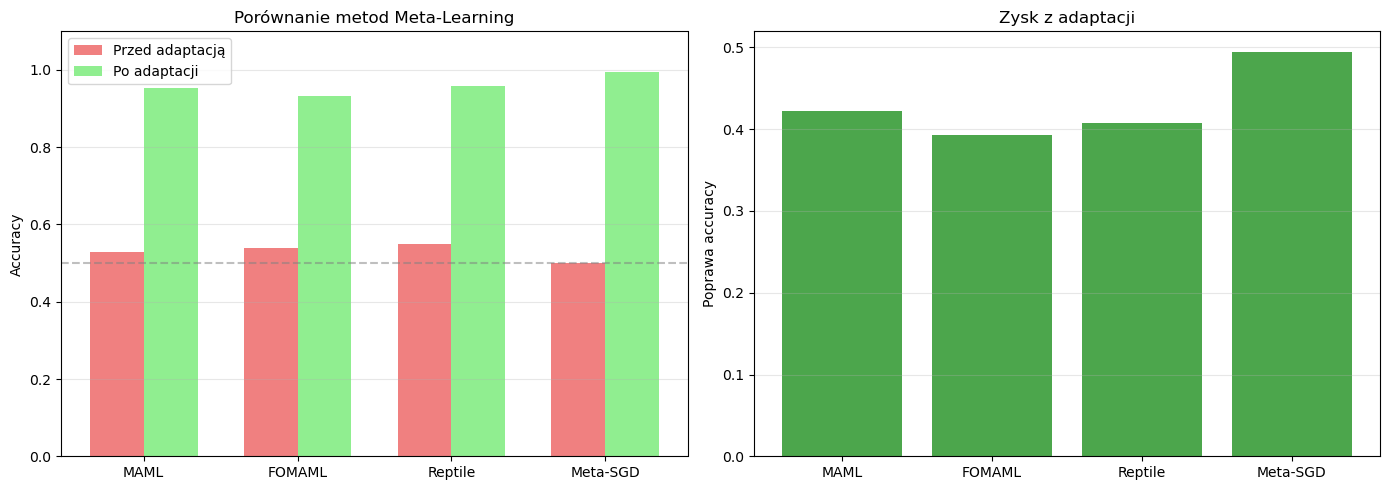


Wnioski:
- Wszystkie metody skutecznie adaptują się do nowych tasków
- MAML i Meta-SGD dają najlepsze wyniki (drugie pochodne)
- FOMAML jest dobrym kompromisem
- Reptile jest najprostszy, ale też skuteczny


In [ ]:
# Wizualizacja porównawcza
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Wykres 1: Accuracy przed i po adaptacji
methods = list(results.keys())
before_means = [sum(results[m][0])/len(results[m][0]) for m in methods]
after_means = [sum(results[m][1])/len(results[m][1]) for m in methods]

x = range(len(methods))
width = 0.35

bars1 = axes[0].bar([i - width/2 for i in x], before_means, width, label='Przed adaptacją', color='lightcoral')
bars2 = axes[0].bar([i + width/2 for i in x], after_means, width, label='Po adaptacji', color='lightgreen')

axes[0].set_ylabel('Accuracy')
axes[0].set_title('Porównanie metod Meta-Learning')
axes[0].set_xticks(x)
axes[0].set_xticklabels(methods)
axes[0].legend()
axes[0].set_ylim(0, 1.1)
axes[0].axhline(y=0.5, color='gray', linestyle='--', alpha=0.5, label='Random')
axes[0].grid(True, axis='y', alpha=0.3)

# Wykres 2: Gain (poprawa po adaptacji)
gains = [after_means[i] - before_means[i] for i in range(len(methods))]
colors = ['green' if g > 0 else 'red' for g in gains]
axes[1].bar(methods, gains, color=colors, alpha=0.7)
axes[1].set_ylabel('Poprawa accuracy')
axes[1].set_title('Zysk z adaptacji')
axes[1].axhline(y=0, color='black', linestyle='-', linewidth=0.5)
axes[1].grid(True, axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\nWnioski:")
print("- Wszystkie metody skutecznie adaptują się do nowych tasków")
print("- MAML i Meta-SGD dają najlepsze wyniki (drugie pochodne)")
print("- FOMAML jest dobrym kompromisem")
print("- Reptile jest najprostszy, ale też skuteczny")

## Zaawansowane aspekty Meta-Learningu

### 1. Task Distribution

Wydajność meta-learningu silnie zależy od **dystrybucji tasków** podczas treningu:
- Taski treningowe powinny być podobne do tasków testowych
- Zbyt łatwe taski = model się nie uczy
- Zbyt trudne taski = model się nie uczy
- Optymalna trudność = taski, które są rozwiązywalne po adaptacji

### 2. Liczba kroków adaptacji

| Mało kroków (1-3) | Dużo kroków (10+) |
|-------------------|-------------------|
| Szybsza adaptacja | Lepsza wydajność |
| Mniej overfittingu | Ryzyko overfittingu na support set |
| Wymaga lepszej inicjalizacji | Bardziej elastyczne |

### 3. Stabilność treningu

MAML może być niestabilny z powodu:
- Eksplodujących gradientów (drugie pochodne)
- Zbyt dużych learning rate'ów

Rozwiązania:
- Gradient clipping
- Mniejsze learning rate'y
- FOMAML zamiast pełnego MAML

### 4. Skalowanie do większych modeli

Dla dużych modeli (ResNet, Transformers):
- MAML jest bardzo kosztowny pamięciowo
- FOMAML lub Reptile są praktyczniejsze
- Można też adaptować tylko część warstw (np. ostatnie)

### 5. Meta-Learning w innych domenach

Meta-learning nie ogranicza się do klasyfikacji obrazów:
- **Reinforcement Learning**: Szybka adaptacja do nowych zadań
- **NLP**: Few-shot learning dla nowych języków/zadań
- **Drug Discovery**: Uczenie z małej liczby próbek
- **Robotics**: Adaptacja do nowych środowisk

## Porównanie: Metric-Based vs Meta-Learning

| Aspekt | Prototypical Networks | MAML |
|--------|----------------------|------|
| **Co się uczy?** | Embedding space | Inicjalizacja wag |
| **Adaptacja wag podczas inference?** | ❌ Nie | ✅ Tak |
| **Złożoność obliczeniowa** | Niska | Wysoka (gradienty przez gradienty) |
| **Elastyczność** | Tylko klasyfikacja z metryką | Dowolne zadanie (regresja, RL, etc.) |
| **Wymagania pamięci** | Niskie | Wysokie |
| **Łatwość implementacji** | Prosta | Trudniejsza |
| **Kiedy lepsze?** | Dobre embeddingi, proste zadania | Trudne adaptacje, różnorodne zadania |

### Kiedy używać czego?

**Metric-based (ProtoNet, MatchingNet):**
- Masz dobry pretrenowany encoder
- Zadania są podobne do tych z pretrainingu
- Potrzebujesz szybkiej inference

**Meta-learning (MAML):**
- Zadania wymagają prawdziwej adaptacji
- Różnorodne typy zadań
- Masz zasoby obliczeniowe

---

# Ćwiczenia

## Ćwiczenie 2 (Obowiązkowe): Implementacja MAML Inner Loop

**Zadanie:** Uzupełnij poniższy kod, implementując pętlę wewnętrzną (inner loop) MAML.

Musisz:
1. **TODO 1:** Wykonać forward pass z aktualnymi wagami
2. **TODO 2:** Obliczyć gradienty i zaktualizować wagi
3. **TODO 3:** Obliczyć loss na query set po adaptacji
4. **TODO 4:** Obliczyć accuracy przed i po adaptacji

In [ ]:
# Ćwiczenie 2: Implementacja MAML Inner Loop
import torch
import torch.nn as nn
import torch.nn.functional as F

torch.manual_seed(42)

# Model
class TinyClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(2, 16)
        self.fc2 = nn.Linear(16, 2)
    
    def forward(self, x):
        x = F.relu(self.fc1(x))
        return self.fc2(x)

# Funkcja generująca task
def create_task():
    angle = torch.rand(1) * 2 * 3.14159
    direction = torch.tensor([torch.cos(angle), torch.sin(angle)]).squeeze()
    offset = torch.randn(2) * 2
    c0, c1 = offset - direction * 2, offset + direction * 2
    
    sx = torch.cat([torch.randn(5, 2) * 0.5 + c0, torch.randn(5, 2) * 0.5 + c1])
    sy = torch.cat([torch.zeros(5), torch.ones(5)]).long()
    qx = torch.cat([torch.randn(10, 2) * 0.5 + c0, torch.randn(10, 2) * 0.5 + c1])
    qy = torch.cat([torch.zeros(10), torch.ones(10)]).long()
    
    return sx, sy, qx, qy

# Forward funkcjonalny
def tiny_forward(x, params):
    x = F.linear(x, params['fc1.weight'], params['fc1.bias'])
    x = F.relu(x)
    x = F.linear(x, params['fc2.weight'], params['fc2.bias'])
    return x

# Parametry
inner_lr = 0.5
inner_steps = 5

# Inicjalizacja modelu
exercise_model = TinyClassifier()

# Generuj task
support_x, support_y, query_x, query_y = create_task()

# Pobierz parametry
params = {k: v.clone() for k, v in exercise_model.named_parameters()}

# --------------------------
# Accuracy PRZED adaptacją
# --------------------------
with torch.no_grad():
    logits_before = tiny_forward(query_x, params)
    preds_before = logits_before.argmax(dim=1)
    acc_before = (preds_before == query_y).float().mean().item()
    print(f"Accuracy PRZED adaptacją: {acc_before:.2f}")

# --------------------------
# TODO: Inner loop - adaptacja na support set
# Wykonaj `inner_steps` kroków gradient descent
# --------------------------
adapted_params = {k: v.clone() for k, v in params.items()}

for step in range(inner_steps):
    # TODO 1: Forward pass z adapted_params
    logits = None  # <-- UZUPEŁNIJ
    
    # TODO 2: Oblicz loss i gradienty, zaktualizuj adapted_params
    loss = None  # <-- UZUPEŁNIJ
    grads = None  # <-- UZUPEŁNIJ (użyj torch.autograd.grad)
    
    # Aktualizacja wag (odkomentuj po uzupełnieniu powyższego)
    # adapted_params = {
    #     k: v - inner_lr * g 
    #     for (k, v), g in zip(adapted_params.items(), grads)
    # }

# --------------------------
# TODO 3: Oblicz accuracy PO adaptacji
# --------------------------
with torch.no_grad():
    logits_after = None  # <-- UZUPEŁNIJ
    preds_after = None   # <-- UZUPEŁNIJ
    acc_after = None     # <-- UZUPEŁNIJ

# Odkomentuj po uzupełnieniu:
# print(f"Accuracy PO adaptacji: {acc_after:.2f}")
# print(f"Poprawa: {acc_after - acc_before:+.2f}")

## Ćwiczenie 3 (Opcjonalne): Porównanie liczby kroków adaptacji

**Zadanie:** Zbadaj wpływ liczby kroków adaptacji (`inner_steps`) na wydajność MAML.

Musisz:
1. Przetestować różne wartości `inner_steps`: [1, 3, 5, 10, 20]
2. Dla każdej wartości obliczyć średnią accuracy na 20 taskach
3. Narysować wykres pokazujący zależność accuracy od liczby kroków
4. Wyciągnąć wnioski

In [ ]:
# Ćwiczenie 3: Porównanie liczby kroków adaptacji

# Lista wartości inner_steps do przetestowania
steps_to_test = [1, 3, 5, 10, 20]
n_test_tasks = 20

# TODO: Uzupełnij poniższy kod

results_by_steps = {}

for n_steps in steps_to_test:
    accs = []
    
    for _ in range(n_test_tasks):
        sx, sy, qx, qy = generate_task()
        
        # TODO: Użyj funkcji evaluate_model z odpowiednim n_steps
        # Wskazówka: evaluate_model(model, sx, sy, qx, qy, inner_lr, n_steps)
        _, acc = None, None  # <-- UZUPEŁNIJ
        
        # accs.append(acc)
    
    # results_by_steps[n_steps] = sum(accs) / len(accs)
    # print(f"inner_steps={n_steps:2d}: accuracy={results_by_steps[n_steps]:.3f}")

# TODO: Narysuj wykres
# plt.figure(figsize=(10, 5))
# plt.plot(list(results_by_steps.keys()), list(results_by_steps.values()), 'o-', linewidth=2, markersize=8)
# plt.xlabel('Liczba kroków adaptacji (inner_steps)')
# plt.ylabel('Średnia accuracy')
# plt.title('Wpływ liczby kroków adaptacji na wydajność MAML')
# plt.grid(True)
# plt.show()

# TODO: Napisz wnioski w komentarzu poniżej
# Wnioski:
# 1. ...
# 2. ...
# 3. ...